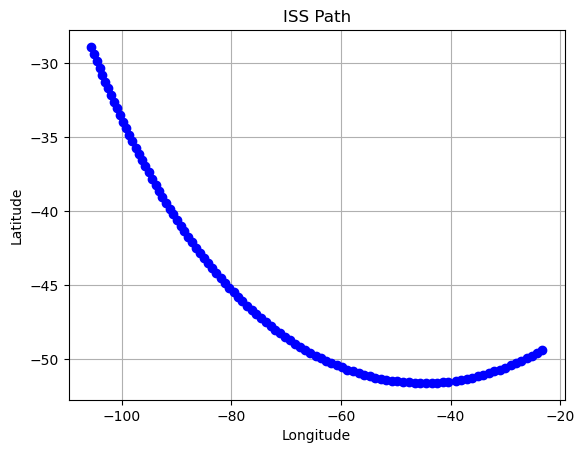

In [9]:
import requests
import matplotlib.pyplot as plt
import datetime
import time

def track_ISS():
    url = "http://api.open-notify.org/iss-now.json"
    data_points = []
    
    for _ in range(100):
        responses = requests.get(url)
        if responses.status_code == 200:
            data = responses.json()
            timestamp = datetime.datetime.fromtimestamp(data['timestamp'])
            latitude = float(data['iss_position']['latitude'])
            longitude = float(data['iss_position']['longitude'])
            
            data_points.append((latitude, longitude, timestamp))
            time.sleep(10)  
        else:
            print("Error: Failed to fetch data from the API.")
            break

    return data_points

def plot_iss_path(data_points):
    latitudes = [point[0] for point in data_points]
    longitudes = [point[1] for point in data_points]

    plt.plot(longitudes, latitudes, 'bo-')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('ISS Path')
    plt.grid(True)
    plt.show()

# Main 
data_points = track_ISS()
plot_iss_path(data_points)
